In [28]:
def r2_rmse_vals( Y_true, Y_pred, label ) :
    # (ypred-ytrue) squared numeratore
    diff_numeratore = []
    for idx, v in enumerate ( Y_pred ):
        diff_nu = v-Y_true[idx]
        diff_numeratore.append( diff_nu )
    diff_numeratore_SQUARED = []
    for v in diff_numeratore :
        v = v**2
        diff_numeratore_SQUARED.append( v )
    # numero elememti y_true ( per fare la media )
    num_elementi = 0
    for v in Y_true :
        num_elementi = num_elementi + 1
    # sommatoria elememti media 
    somma = 0
    for v in Y_true :
        somma = somma + v
    media = somma/num_elementi
    # sopra ho calcolato la media ( vedi denominatore )
    # sommatoria diff denominatore squared 
    diff_denominatore = []
    for idx, v in enumerate ( Y_true ):
        diff_de = v-media 
        diff_denominatore.append( diff_de )
    diff_denominatore_SQUARED = []
    for v in diff_denominatore :
        v = v**2
        diff_denominatore_SQUARED.append( v )
    sommatoria_numeratore = 0
    for v in diff_numeratore_SQUARED :
        sommatoria_numeratore = sommatoria_numeratore+v
    sommatoria_denominatore = 0
    for v in diff_denominatore_SQUARED :
        sommatoria_denominatore = sommatoria_denominatore+v
    # r2_val 
    r2 = 1-(sommatoria_numeratore/sommatoria_denominatore)
    print("r2 su",label,"set è :", r2 )
    # y_true-y_pred SQUARED 
    diff_rmse_numeratore = []
    for idx, v in enumerate ( Y_true ) :
        diff_rmse_numeratore.append( v-Y_pred[idx] )
    diff_rmse_numeratore_SQUARED = []
    for v in diff_rmse_numeratore :
        v = v**2
        diff_rmse_numeratore_SQUARED.append( v )
    sommatoria_diff_rmse = 0
    for v in diff_rmse_numeratore_SQUARED :
        sommatoria_diff_rmse = sommatoria_diff_rmse+v
    # RMSE
    rmse = (sommatoria_diff_rmse/num_elementi)**0.5
    print("rmse su",label,"set è :", rmse )   

In [29]:
%%time
import pandas as pd
file = './data/MOE_GRID_1078.xlsx'
file_read = pd.read_excel(file)
file_dataframe = pd.DataFrame(file_read)
file_dataframe

CPU times: user 7.14 s, sys: 35.9 ms, total: 7.18 s
Wall time: 7.47 s


,Unnamed: 0,Unnamed: 0.1,UNIQUEID,SMILE,SETID,DESCRIPTOR,LOGD,mol,AM1_dipole,AM1_E,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
0,0,0,A-logD7.4-100,Fc1cc2c(N(C=C(C(O)=O)C2=O)C2CC2)cc1N1CCNCC1,Tr,1 0 0 0 0 0 0 0 ...,-0.960,Fc1c(N2CCNCC2)cc2N(C3CC3)C=C(C(=O)O)C(=O)c2c1,7.750276,-103541.820,...,75.625,12.500,4.500,0.625,0.0,0.0,331.34698,1234,43,134
1,1,1,A-logD7.4-101,S1(=O)(=O)N(CCN1C)c1cc2c([nH]cc2CCN(C)C)cc1,Tr,1 0 0 0 0 0 0 0 ...,-0.920,O=S1(=O)N(C)CCN1c1cc2c(CCN(C)C)c[nH]c2cc1,4.358144,-89582.016,...,74.125,10.500,2.500,0.000,0.0,0.0,322.43298,1055,35,120
2,2,2,A-logD7.4-104,OC=1C(=O)C=CN(CCCO)C=1C,Tr,1 0 0 0 0 0 0 0 ...,-0.900,O=C1C(O)=C(C)N(CCCO)C=C1,5.544390,-57643.316,...,29.625,6.125,1.125,0.000,0.0,0.0,183.20700,254,18,60
3,3,3,A-logD7.4-105,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2ccccc2C)cc1N1CCNCC1,Tr,1 0 0 0 0 0 0 0 ...,-0.830,Fc1c(N2CCNCC2)cc2N(c3c(C)cccc3)C=C(C(=O)O)C(=O...,8.887918,-116000.170,...,84.375,11.500,4.125,0.625,0.0,0.0,381.40698,1842,51,152
4,4,4,A-logD7.4-106,OC=1C(=O)C=CN(CCC(=O)NCC)C=1C,Tr,1 0 0 0 0 0 0 0 ...,-0.820,O=C(NCC)CCN1C(C)=C(O)C(=O)C=C1,6.219123,-69271.062,...,56.875,14.125,3.125,0.000,0.0,0.0,224.25999,483,22,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,1086,1086,O-88,O(CC(O)CNC(C)C)c1ccccc1CC=C,Tr,1 0 0 0 0 0 0 0 ...,1.000,O(C[C@@H](O)CNC(C)C)c1c(CC=C)cccc1,0.588812,-71140.453,...,56.500,14.250,3.625,0.750,0.0,0.0,249.35399,711,21,80
1074,1087,1087,O-9,O1CCC[C@H]1C(=O)N1CCN(CC1)c1nc(N)c2cc(OC)c(OC)...,Tr,1 0 0 0 0 0 0 0 ...,1.140,O=C(N1CCN(c2nc(N)c3c(n2)cc(OC)c(OC)c3)CC1)[C@H...,2.551292,-117421.360,...,126.125,25.375,8.875,1.375,0.0,0.0,387.44000,2195,47,150
1075,1088,1088,O-94,O1c2c(C=CC1=O)cccc2,Tr,1 0 0 0 0 0 0 0 ...,1.415,O=C1Oc2c(cccc2)C=C1,4.817789,-43230.504,...,2.875,0.000,0.000,0.000,0.0,0.0,146.14499,144,14,56
1076,1089,1089,O-97,Clc1cccc(Cl)c1C=NN=C(N)N,Te,1 0 0 0 0 0 0 0 ...,1.670,Clc1c(C=N/N=C(\N)/N)c(Cl)ccc1,2.182817,-62454.488,...,156.875,43.875,12.250,0.875,0.0,0.0,231.08600,331,17,64


In [30]:
%%time
import numpy as np 
import string


list_of_desc = ["a_acc", \
                  "bpol", \
                  "b_double", \
                  "b_rotN", \
                  "b_rotR", \
                  "chi1_C", \
                  "diameter", \
                  "logP(o/w)", \
                  "logS", \
                  "PEOE_VSA+0", \
                  "PEOE_VSA+3", \
                  "PEOE_VSA-0", \
                  "PEOE_VSA-2", \
                  "PEOE_VSA-5", \
                  "PEOE_VSA_POS", \
                  "SlogP_VSA0", \
                  "SlogP_VSA1", \
                  "SlogP_VSA2", \
                  "SlogP_VSA3", \
                  "SlogP_VSA4", \
                  "SlogP_VSA8", \
                  "SMR_VSA1", \
                  "SMR_VSA6", \
                  "TPSA", \
                  "vsa_acc", \
                  "vsa_other", \
                  "vsa_pol", \
                  "weinerPol", \
                  "DESCRIPTOR"]
                
basicname = ["G", "M", "GM", \
             "GTr", "GTe", \
             "MTe", "MTr", \
             "GMTe", "GMTr"]

X = {}
Y = {}
setid = {}
uniqueid = {}

for bn in basicname:
    X[bn] = []
    Y[bn] = []
    setid[bn] = []
    uniqueid[bn] = []

for idx, ss in enumerate(file_read["UNIQUEID"]):
    
    fdesc = file_read[file_read["UNIQUEID"] == ss]
    
    xval = {}
    for bn in basicname:
        xval[bn] = []

    for d in list_of_desc:
        if d == "DESCRIPTOR":
            nvs = fdesc[d].values[0].split()
            xval["GM"].extend([float(nv) for nv in nvs])  
            xval["G"].extend([float(nv) for nv in nvs])  
            xval["GMTr"].extend([float(nv) for nv in nvs])  
            xval["GTr"].extend([float(nv) for nv in nvs])  
            xval["GMTe"].extend([float(nv) for nv in nvs])  
            xval["GTe"].extend([float(nv) for nv in nvs])  
        else:
            xval["GM"].append(fdesc[d].values[0])
            xval["M"].append(fdesc[d].values[0])
            xval["GMTr"].append(fdesc[d].values[0])
            xval["MTr"].append(fdesc[d].values[0])
            xval["GMTe"].append(fdesc[d].values[0])
            xval["MTe"].append(fdesc[d].values[0])
            
    y = file_read[file_read["UNIQUEID"] == ss]['LOGD'].values[0]
    sid = file_read[file_read["UNIQUEID"] == ss]['SETID'].values[0]
    uid = file_read[file_read["UNIQUEID"] == ss]['UNIQUEID'].values[0]
    
    for bn in ["GM", "G", "M"]:
        X[bn].append(xval[bn])
        Y[bn].append(y)
        setid[bn].append(sid)
        uniqueid[bn].append(uid)
        
    if (sid == "Tr"):
        for bn in ["GMTr", "GTr", "MTr"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)
    elif (sid == "Te"):
        for bn in ["GMTe", "GTe", "MTe"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)


for bn in basicname:
    print(bn, " : ")
    print("  ", np.asarray(Y[bn]).shape, np.asarray(X[bn]).shape )  

G  : 
   (1078,) (1078, 1879)
M  : 
   (1078,) (1078, 28)
GM  : 
   (1078,) (1078, 1907)
GTr  : 
   (865,) (865, 1879)
GTe  : 
   (213,) (213, 1879)
MTe  : 
   (213,) (213, 28)
MTr  : 
   (865,) (865, 28)
GMTe  : 
   (213,) (213, 1907)
GMTr  : 
   (865,) (865, 1907)
CPU times: user 11.7 s, sys: 4.02 ms, total: 11.7 s
Wall time: 11.7 s


In [31]:
%%time
import sklearn 
import sklearn.preprocessing 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_G_SCALED_Tr = scaler.fit_transform(X['GTr'])
X_G_SCALED_Tr_dataframe = pd.DataFrame(X_G_SCALED_Tr)

X_G_SCALED_Te = scaler.fit_transform(X['GTe'])
X_G_SCALED_Te_dataframe = pd.DataFrame(X_G_SCALED_Te)
print(X_G_SCALED_Tr_dataframe)
print(X_G_SCALED_Te_dataframe)

X_G_SCALED_TOT = scaler.fit_transform(X['G'])
X_G_SCALED_TOT_dataframe = pd.DataFrame(X_G_SCALED_TOT)
print(X_G_SCALED_TOT_dataframe)

     0         1         2        3     4        5        6     7     \
0     0.0 -0.034021 -0.034021 -0.04814   0.0 -0.04814 -0.06816   0.0   
1     0.0 -0.034021 -0.034021 -0.04814   0.0 -0.04814 -0.06816   0.0   
2     0.0 -0.034021 -0.034021 -0.04814   0.0 -0.04814 -0.06816   0.0   
3     0.0 -0.034021 -0.034021 -0.04814   0.0 -0.04814 -0.06816   0.0   
4     0.0 -0.034021 -0.034021 -0.04814   0.0 -0.04814 -0.06816   0.0   
..    ...       ...       ...      ...   ...      ...      ...   ...   
860   0.0 -0.034021 -0.034021 -0.04814   0.0 -0.04814 -0.06816   0.0   
861   0.0 -0.034021 -0.034021 -0.04814   0.0 -0.04814 -0.06816   0.0   
862   0.0 -0.034021 -0.034021 -0.04814   0.0 -0.04814 -0.06816   0.0   
863   0.0 -0.034021 -0.034021 -0.04814   0.0 -0.04814 -0.06816   0.0   
864   0.0 -0.034021 -0.034021 -0.04814   0.0 -0.04814 -0.06816   0.0   

         8        9     ...      1869     1870  1871  1872      1873  \
0   -0.034021 -0.13728  ... -0.034021 -0.33422   0.0   0.0 -0.3

In [32]:
%%time
Y_G_Tr = Y['GTr']
Y_G_Te = Y['GTe']
Y_G_TOT = Y['G']

CPU times: user 321 µs, sys: 2 µs, total: 323 µs
Wall time: 329 µs


Errori sul set totale : 0.18078395714256495 0.3144500838662139 0.36133582928335317
Errori sul set test : 0.6544009019579342 0.5178302701208427 0.8222471081061643
Errori sul set training : 0.09575599562996541 0.016679793187099765 0.09715916823578222


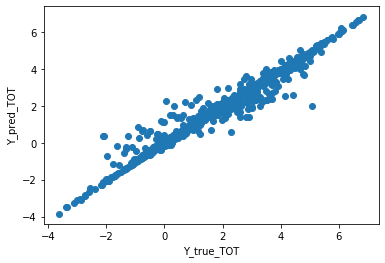

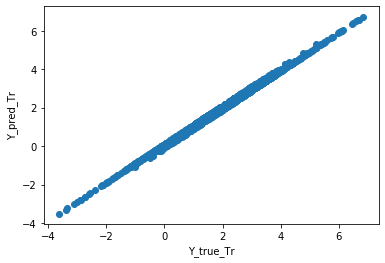

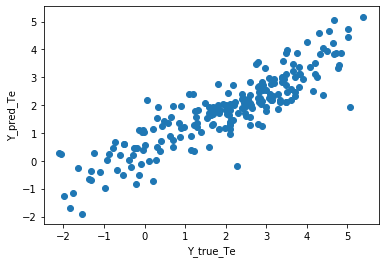

r2_Te = 0.7609534838561484
CPU times: user 31.2 s, sys: 19.9 ms, total: 31.2 s
Wall time: 31.7 s


In [33]:
%%time
import math
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score


def r2_RMSE_diff_abs_label( Y_true, Y_pred, label):
    r2_val = r2_score( Y_true, Y_pred )
    print( " Il valore di r2 sul",label,"set è:", r2_val)
    RMSE_val = mean_squared_error( Y_true, Y_pred, squared=False )
    print( " Il valore di RMSE sul",label,"set è:", RMSE_val)
    
    diff_abs_modello = []
    diff_NOabs_modello = []
    for idx, v in enumerate(Y_true):
        diff_abs = math.fabs(v-Y_pred[idx])
        diff_abs_modello.append(diff_abs)
        diff_NOabs = v-Y_pred[idx]
        diff_NOabs_modello.append(diff_NOabs)
    
    print( "Gli errori sul", label," set sono :",np.average(diff_abs_modello), np.std(diff_abs_modello), np.std(diff_NOabs_modello) )
    
def q2r2cvTr_RMSEcvTr(X_Tr, Y_Tr, Y_cv, modello):
    q2r2_Tr_cv = r2_score( Y_Tr, Y_cv)
    RMSE_cv_Tr = mean_squared_error( Y_Tr, Y_cv, squared=False)
    cross_val_score_Tr = cross_val_score( modello, X_Tr,Y_Tr,cv=10 )
    print("q2_r2_Tr:", q2r2_Tr_cv)
    print("RMSE_cv_Tr:", RMSE_cv_Tr)
    print("cross_val_score_Tr:", cross_val_score_Tr)
    


svr_model = svm.SVR(gamma='auto',kernel='sigmoid', C=50, epsilon=0.1)
svr_model.fit(X_G_SCALED_Tr,Y_G_Tr)
Y_pred_TOT = svr_model.predict(X_G_SCALED_TOT)
Y_pred_Tr = svr_model.predict(X_G_SCALED_Tr)
Y_cv_Tr = cross_val_predict( svr_model, X_G_SCALED_Tr,Y_G_Tr, cv=10)
Y_pred_Te = svr_model.predict(X_G_SCALED_Te)

diff_abs_modello_Tot = []
diff_NOabs_modello_Tot = []
diff_abs_modello_Te = []
diff_NOabs_modello_Te = []
diff_abs_modello_Tr = []
diff_NOabs_modello_Tr = []
    
for idx, v in enumerate(Y_G_TOT):
    diff_abs = math.fabs(v-Y_pred_TOT[idx])
    diff_abs_modello_Tot.append(diff_abs)
    diff_NOabs = v-Y_pred_TOT[idx]
    diff_NOabs_modello_Tot.append(diff_NOabs)
        
for idx,v in enumerate (Y_G_Te):
    diff_abs_Te = math.fabs(v-Y_pred_Te[idx])
    diff_abs_modello_Te.append(diff_abs_Te)
    diff_NOabs_Te = v-Y_pred_Te[idx]
    diff_NOabs_modello_Te.append(diff_NOabs_Te)
        
for idx,v in enumerate (Y_G_Tr):
    diff_abs_Tr = math.fabs(v-Y_pred_Tr[idx])
    diff_abs_modello_Tr.append(diff_abs_Tr)
    diff_NOabs_Tr = v-Y_pred_Tr[idx]
    diff_NOabs_modello_Tr.append(diff_NOabs_Tr)
    
print( "Errori sul set totale :",np.average(diff_abs_modello_Tot), np.std(diff_abs_modello_Tot), np.std(diff_NOabs_modello_Tot) )
print( "Errori sul set test :",np.average(diff_abs_modello_Te), np.std(diff_abs_modello_Te), np.std(diff_NOabs_modello_Te) )
print( "Errori sul set training :",np.average(diff_abs_modello_Tr), np.std(diff_abs_modello_Tr), np.std(diff_NOabs_modello_Tr) )             
    
    
plt.scatter(Y_G_TOT, Y_pred_TOT)
plt.xlabel("Y_true_TOT")
plt.ylabel("Y_pred_TOT")
plt.show()   
    
plt.scatter(Y_G_Tr, Y_pred_Tr)
plt.xlabel("Y_true_Tr")
plt.ylabel("Y_pred_Tr")
plt.show() 
    
plt.scatter(Y_G_Te, Y_pred_Te)
plt.xlabel("Y_true_Te")
plt.ylabel("Y_pred_Te")
plt.show() 
r2_Te = r2_score(Y_G_Te, Y_pred_Te)
print("r2_Te =", r2_Te)

In [34]:
r2_rmse_vals( Y_G_TOT,Y_pred_TOT,"Tot")

r2 su Tot set è : 0.9611535048831822
rmse su Tot set è : 0.3627143427045501


In [35]:
r2_rmse_vals( Y_G_Te,Y_pred_Te,"Te")

r2 su Te set è : 0.760953483856148
rmse su Te set è : 0.8344990887573113


In [36]:
r2_rmse_vals( Y_G_Tr, Y_pred_Tr, "Tr")

r2 su Tr set è : 0.9972999074225306
rmse su Tr set è : 0.09719787137509941
